<a href="https://colab.research.google.com/github/aditi310896/Bulbdetection/blob/master/Multiclassmodeltrial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 #Authentication and Setup 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Ncessary imports
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)

import os
import imageio # used for writing images
from random import shuffle
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings
import random
warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# a = []
# while(1):
#     a.append('1')

In [3]:
 
# Mounting google drive; link google drive with colab
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Getting basic statistics about the training images
os.chdir("/content/drive/My Drive/Wavelength/Main data")
DIR = '/content/drive/My Drive/Wavelength/Main data'
train_data_dir="/content/drive/My Drive/Wavelength/Main data"
validation_data_dir="/content/drive/My Drive/Wavelength/Val"
test_data_dir='/content/drive/My Drive/Wavelength/testit'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
batch_size=32
img_height=400
img_width=400
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

generator_top_train = train_datagen.flow_from_directory(   
         train_data_dir, 
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=True)  
nb_train_samples = len(generator_top_train.filenames)  
num_classes = len(generator_top_train.class_indices) 
train_labels = generator_top_train.classes   
train_data,train_labels=generator_top_train.next()
#train_labels = to_categorical(train_labels, num_classes=num_classes)


Found 6003 images belonging to 6 classes.


In [ ]:
label_map = (generator_top_train.class_indices)


In [ ]:
label_map

{'A19': 0, 'BR2040': 1, 'MR16': 2, 'PAR203038': 3, 'R20': 4, 'T5T8': 5}

In [ ]:
#[a][b][c] where a is the batch number b is the label and c is the image in that batch
generator_top_train[12][1][10]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)
generator_top_val = val_datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=True)  
   
nb_validation_samples = len(generator_top_val.filenames)  
validation_data,validation_labels=generator_top_val.next()
#validation_labels = to_categorical(validation_labels, num_classes=num_classes)


Found 266 images belonging to 6 classes.


In [ ]:
# batch_size=32
# test_datagen = ImageDataGenerator(rescale=1./255)
# generator_top_test = test_datagen.flow_from_directory(  
#          test_data_dir,  
#          target_size=(img_width, img_height),  
#          batch_size=batch_size,  
#          class_mode='categorical')  
   
# nb_test_samples = len(generator_top_test.filenames)  
  
# # predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
# # bottleneck_features_test = saved_model.predict_generator(  
# #      generator_top_test, predict_size_test)

# test_data,test_labels=generator_top_test.next()
# #test_labels = to_categorical(test_labels, num_classes=num_classes)




Found 383 images belonging to 6 classes.


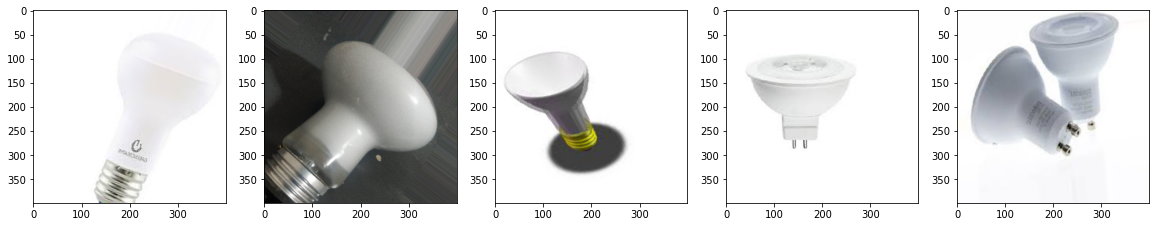

In [ ]:

plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(train_data[i])

MOdel 1

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

batch_size = 64
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(400, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(2048, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))  #Dropout for regularization #try 0.3 or something otherwise 0.5
model.add(layers.Dense(1024, activation='relu'))#1024
model.add(layers.Dense(num_classes, activation='softmax'))  #Softmax function at the end because we have multiple classes

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 197, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 128)      

VGG net


In [ ]:
#VGG transfer learning model
from keras.applications import vgg16 as vgg
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(400, 400, 3))

# Extract the last layer from third block of vgg16 model
last = base_model.get_layer('block3_pool').output

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
# Add classification layers on top of it
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.engine import Model

x = GlobalAveragePooling2D()(last)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(6, activation='softmax')(x)
model = Model(base_model.input, pred)

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
for layer in base_model.layers:
     layer.trainable = False

Resnet

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(400,400,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output=output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 400, 400, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 406, 406, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 200, 200, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 200, 200, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(restnet)
model.add(Dense(512, activation='relu', input_shape=(400, 400, 3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [ ]:
#Lets see our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 197, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 128)      

In [ ]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use categorical_crossentropy loss because its a binary classification
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc']) #1e-4

In [ ]:

history = model.fit(
    generator_top_train,
    steps_per_epoch = generator_top_train.samples // batch_size,
    validation_data = generator_top_val, 
    validation_steps = generator_top_val.samples // batch_size,
    epochs = 100)

# batch_size=64
# history = model.fit(generator_top_train,  
#       epochs=7,
#       validation_data=generator_top_val)

Epoch 1/100
93/93 [==============================] - 777s 8s/step - loss: 1.7217 - acc: 0.2913 - val_loss: 1.7574 - val_acc: 0.2109
Epoch 2/100
93/93 [==============================] - 773s 8s/step - loss: 1.6602 - acc: 0.3021 - val_loss: 1.5428 - val_acc: 0.3828
Epoch 3/100
93/93 [==============================] - 143s 2s/step - loss: 1.5734 - acc: 0.3669 - val_loss: 1.4543 - val_acc: 0.4623
Epoch 4/100
93/93 [==============================] - 123s 1s/step - loss: 1.5520 - acc: 0.3649 - val_loss: 1.2974 - val_acc: 0.4688
Epoch 5/100
93/93 [==============================] - 126s 1s/step - loss: 1.4816 - acc: 0.4114 - val_loss: 1.4020 - val_acc: 0.4245
Epoch 6/100
93/93 [==============================] - 124s 1s/step - loss: 1.4437 - acc: 0.4190 - val_loss: 1.4001 - val_acc: 0.4219
Epoch 7/100
93/93 [==============================] - 125s 1s/step - loss: 1.4064 - acc: 0.4232 - val_loss: 1.3433 - val_acc: 0.4906
Epoch 8/100
93/93 [==============================] - 127s 1s/step - loss: 1.

In [ ]:
model.evaluate(test_data_generator) 

NameError: ignored

MOdel4

In [ ]:
import math  
import datetime
import time
batch_size=64
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=100,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  



Train on 32 samples, validate on 32 samples
Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 2.5402 - acc: 0.1875 - val_loss: 261.9407 - val_acc: 0.1562
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 293.1033 - acc: 0.2188 - val_loss: 168.5779 - val_acc: 0.2812
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 199.6184 - acc: 0.2500 - val_loss: 80.7706 - val_acc: 0.1562
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 141.7911 - acc: 0.1562 - val_loss: 34.1912 - val_acc: 0.2812
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 83.8192 - acc: 0.1250 - val_loss: 59.5203 - val_acc: 0.2188
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 77.6775 - acc: 0.1875 - val_loss: 43.2810 - val_acc: 0.2812
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 78.2827 - acc: 0.1562 - val_loss: 33.3115 - val_acc: 0.1562
Epoch 8/100
32/32 [==

In [ ]:
#model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = saved_model.evaluate(generator_top_val
, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  


9/9 [==============================] - 122s 14s/step
[INFO] accuracy: 84.96%
[INFO] Loss: 0.27465781569480896


In [ ]:
#.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) =saved_model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

32/32 [==============================] - 0s 2ms/step
[INFO] accuracy: 90.62%
[INFO] Loss: 0.20951655507087708


NameError: ignored

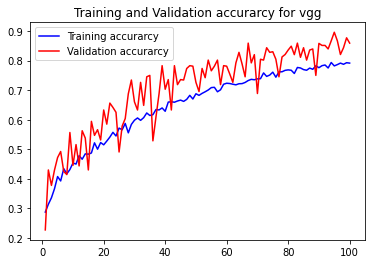

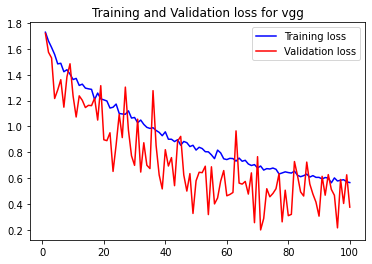

In [ ]:
#lets plot the train and val curve
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy for vgg')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss for vgg')
plt.legend()

plt.show()

In [ ]:
saved_model.evaluate(test_data_generator)

In [ ]:
# # Changing the driectory to the train images folder
os.chdir("/content/drive/My Drive/Wavelength")
# Save the trained model
model.save("multiclasscnnapp.h5")

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 197, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 128)      

In [ ]:
os.chdir("/content/drive/My Drive/Wavelength")

In [ ]:
# model.save_weights('model_weights.h5')
# json_string = model.to_json()
# f = open("model_architecture.json",'w')
# f.write(json_string)
# f.close()

In [ ]:
json_arch=model.to_json() # after getting architecture write as json file to disk for loading with weights in future.


In [ ]:
model_json = model.to_json()

In [ ]:

with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_app.h5")

In [ ]:
f = open("model.json",'r+')
json_string = f.read()
f.close()
model = model_from_json(model_json)
model.load_weights('model_app.h5')

In [ ]:
os.chdir("/content/drive/My Drive/Wavelength")

In [ ]:
# Load the saved model
from keras.models import load_model
saved_model = load_model('multiclasscnnapp.h5')

In [ ]:
os.chdir("/content/drive/My Drive/Wavelength/testfolder")
test_data=('/content/drive/My Drive/Wavelength/testit')

In [ ]:
import numpy
#trying to do a confusion matrix
test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = test_generator.flow_from_directory(
    test_data, # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = saved_model.predict_generator(test_data_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

Found 383 images belonging to 6 classes.


In [ ]:
scores = saved_model.evaluate_generator(test_data_generator ,383) #383 testing images
print("Accuracy = ", scores)

Accuracy =  [0.8994938731193542, 0.7593455910682678]


In [ ]:
saved_model.evaluate(test_data_generator) 

12/12 [==============================] - 6s 511ms/step


[0.41085124015808105, 0.7415143847465515]

In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [ ]:

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

         A19       0.84      0.77      0.80        60
        BR30       0.76      0.65      0.70        69
        MR16       0.68      0.79      0.73        72
       PAR30       0.81      0.78      0.79       122
         R20       0.54      0.65      0.59        31
          T5       0.93      0.97      0.95        29

    accuracy                           0.76       383
   macro avg       0.76      0.77      0.76       383
weighted avg       0.77      0.76      0.76       383



In [ ]:
confusion_matrix= metrics.confusion_matrix(true_classes, predicted_classes)


In [ ]:
#To get better visual of the confusion matrix:
import itertools
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


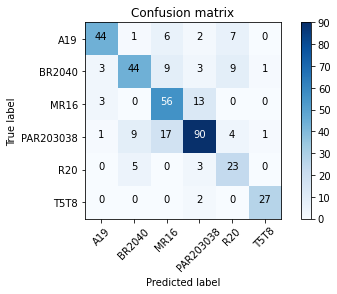

In [ ]:
plot_confusion_matrix(confusion_matrix, ['A19', 'BR2040', 'MR16', 'PAR203038', 'R20', 'T5T8'])

Normalized confusion matrix


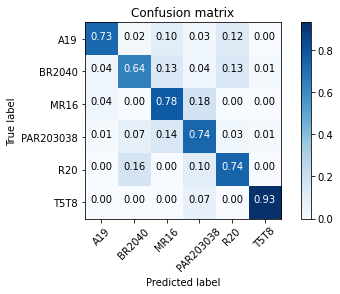

In [ ]:
#Those numbers are all over the place. Now turning normalize= True
plot_confusion_matrix(confusion_matrix, 
                      ['A19', 'BR2040', 'MR16', 'PAR203038', 'R20', 'T5T8'],
                     normalize=True)

In [ ]:
# Testing Model images
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(400, 400))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [ ]:
import time
def test_single_image(path):
    bulbs = ['A19', 'BR2040', 'MR16', 'PAR203038', 'R20', 'T5T8']
    images = read_image(path)
    time.sleep(.5)
    preds = saved_model.predict(images)  
   
    for idx, bulb, x in zip(range(0,6), bulbs , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, bulb, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = saved_model.predict_classes(images)
    #class_predicted.shape()
    class_dictionary = test_data_generator.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    #print(preds)
    
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

In [ ]:

path = '/content/drive/My Drive/Wavelength/tester.jpeg'

[INFO] loading and preprocessing image...
ID: 0, Label: A19 0.44%
ID: 1, Label: BR2040 0.76%
ID: 2, Label: MR16 3.39%
ID: 3, Label: PAR203038 92.61%
ID: 4, Label: R20 2.78%
ID: 5, Label: T5T8 0.02%
Final Decision:
.
..
...
ID: 3, Label: PAR30


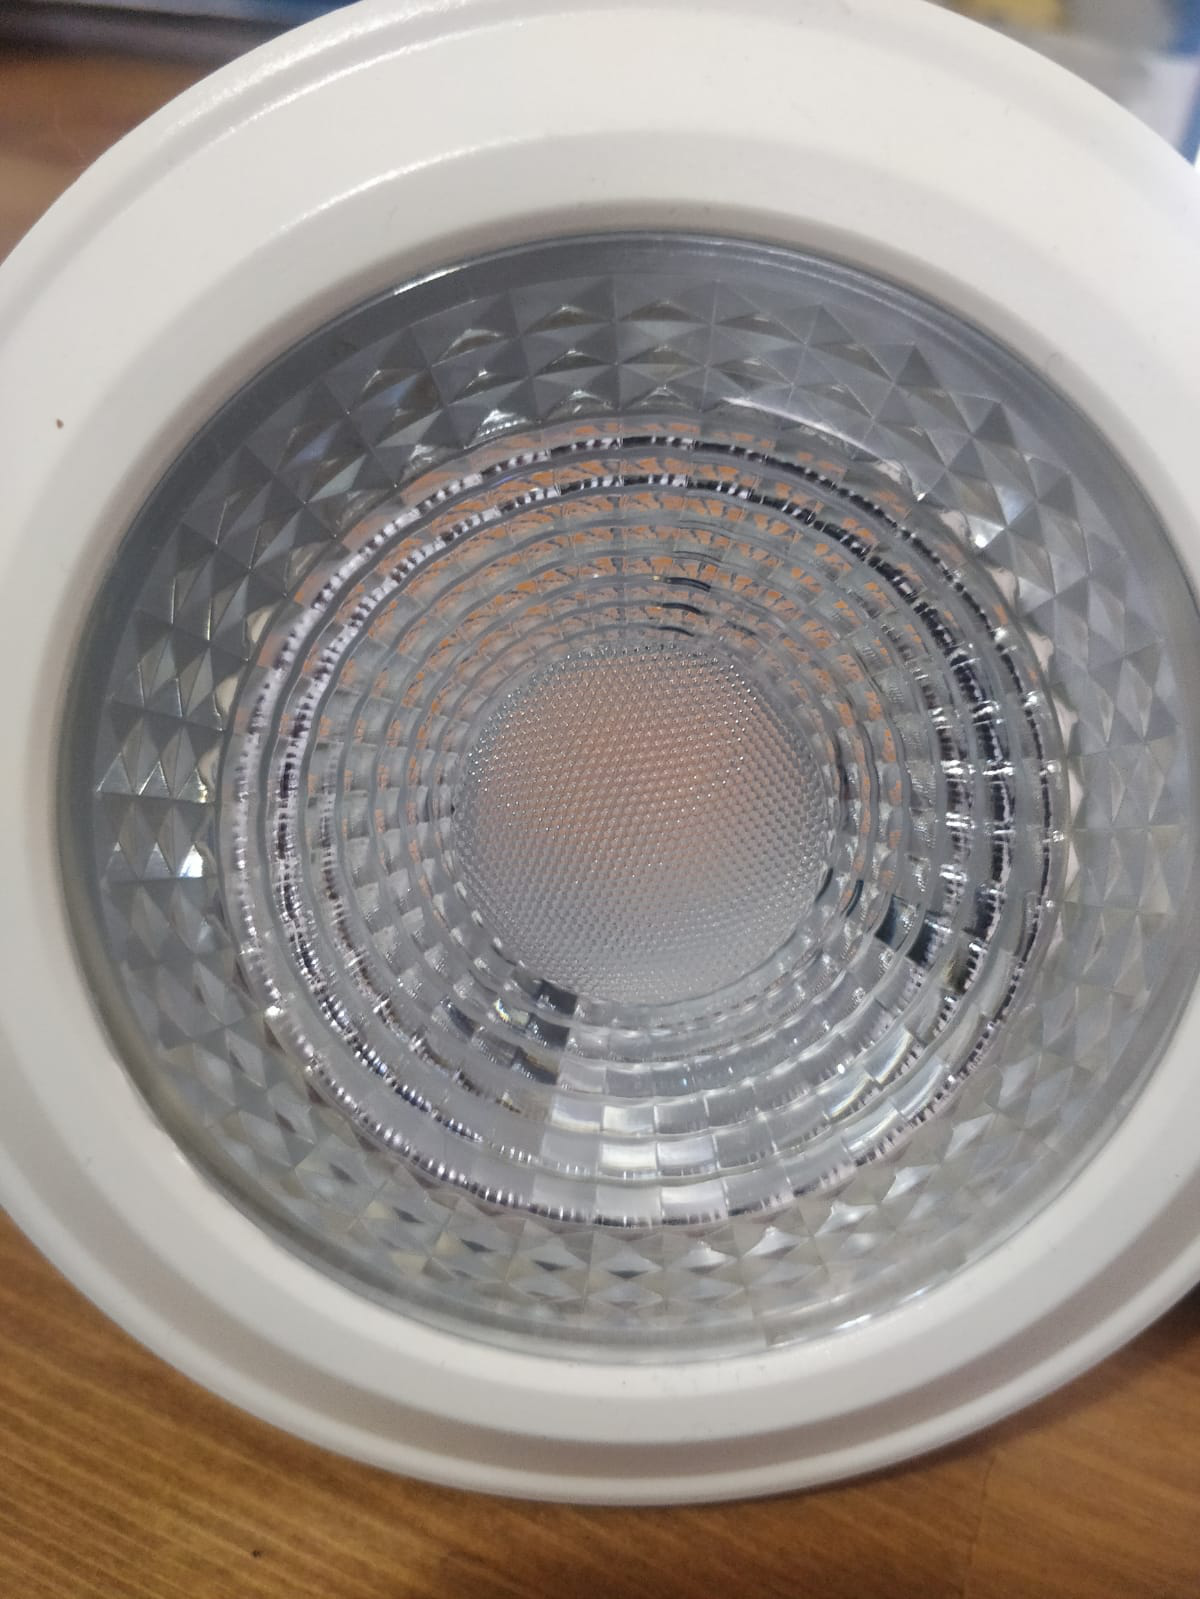

In [ ]:


test_single_image(path)